In [ ]:
import sys

if ".." not in sys.path:
    sys.path.append("..")

import os
import PIL.Image as Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pickle

from collections import defaultdict

from common.task import path_join, load_ground_truths, get_best_bag_of_features_histograms

%load_ext autoreload
%autoreload 2
%matplotlib widget
%matplotlib inline

In [124]:
img_path = '2700270'
n_centroids = 100
step_size = 50
# load ground truth for image 2700270.png
visual_words = load_ground_truths('2700270.gtp') 
visual_word = visual_words[3]
print(f"{visual_word=}")

visual_word=(800, 166, 1007, 246, 'and')


In [162]:
rv = get_best_bag_of_features_histograms('2700270.png', visual_word[:4], n_centroids, step_size)
# not optimized
# outer time: 39.97936000000004
# acc inner time: 39.839147000010826
# outer time: 40.102468000000044
# acc inner time: 39.9182350000101
#
# optimized
# outer time: 3.1077660000000833
# acc inner time: 2.9950079999857735
# outer time: 2.808492000000115
# acc inner time: 2.6949609999501263

outer time (sliding window): 3.1077660000000833
acc inner time (bof_label_count): 2.9950079999857735
time nms: 26.68460899999991


# Visualization

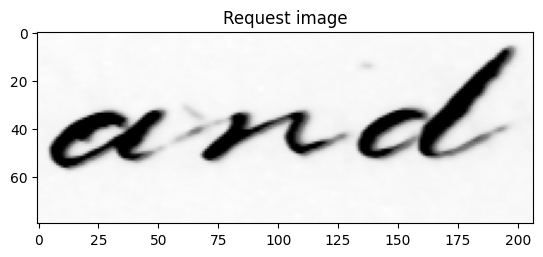

In [163]:
x1, y1, x2, y2, _ = visual_word
document = Image.open(path_join('pages', '2700270.png'))
doc_arr = np.asarray(document, dtype='uint8')
req_arr = doc_arr[y1:y2, x1:x2]

plt.imshow(req_arr, cmap=cm.get_cmap("Greys_r"))
plt.title("Request image")
plt.show()

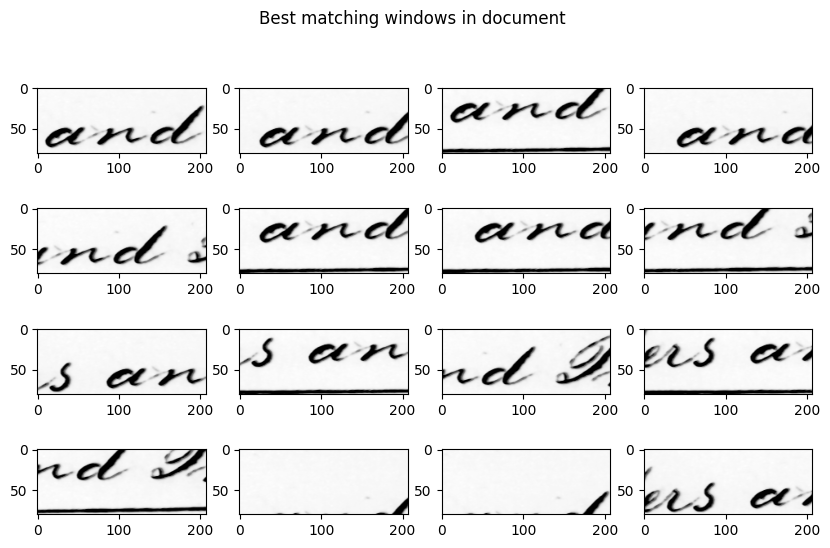

In [164]:
row_cols = 4
fig = plt.figure(figsize=(10, 6))
fig.suptitle("Best matching windows in document")

for idx, info in enumerate(rv):
    if idx == row_cols**2:
        break

    wx, wy, wxx, wyy = info['window']
    ax = fig.add_subplot(row_cols, row_cols, idx + 1)
    subimg = doc_arr[wy:wyy, wx:wxx]
    ax.imshow(subimg, cmap=cm.get_cmap('Greys_r'))

# Evaluation

In [167]:
from common.evaluation import SegmentfreeWordSpottingEvaluator

# 3 - and
# 4 - instructions

img_path = '2700270.png'
n_centroids = 100
step_size = 30
word_index = 3
max_eval_length = 10

sfwse = SegmentfreeWordSpottingEvaluator(
    img_path,
    n_centroids,
    step_size
)

result = sfwse.crossvalidate(word_index, max_eval_length)
prec, rec, mean_prec = result
print(f"{prec=} {rec=} {mean_prec=}")

Evaluating word (800, 166, 1007, 246, 'and')
outer time (sliding window): 3.007137000000057
acc inner time (bof_label_count): 2.8891699999858247
time nms: 29.016834000000017
prec=0.7 rec=1.0 mean_prec=0.9379251700680271


In [ ]:
from common.evaluation import SegmentfreeWordSpottingEvaluator

img_path = '2700270.png'
n_centroids = 100
step_size = 50
word_index = 8
max_eval_length = 10

sfwse = SegmentfreeWordSpottingEvaluator(
    img_path,
    n_centroids,
    step_size,
    plot_results=False
)

rv = sfwse.validate(max_eval_length)
subpath = f'rv_{img_path}_{n_centroids}_{step_size}_{word_index}_{max_eval_length}.p'
with open(path_join('pickle_data', subpath), 'wb') as fh:
    pickle.dump(rv, fh)